In [1]:
from phone_sim import PacketSimulator
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim

In [2]:
# Simulation
def simulate(mu: int, sigma, read_size: int, initbuf = 0) -> pd.DataFrame:
    sim = PacketSimulator(mu, sigma, read_size)
    for _ in range(initbuf):
        sim.send()
    for _ in range(500):
        sim.send()
        sim.recv()
    return pd.DataFrame(sim.logger, columns=["t", "last", "buf", "send", "recv"])

def getlag(df: pd.DataFrame):
    lag_init = df[df["last"] == 1].iloc[0]["t"]-1
    row_5000 = df.iloc[5000]
    lag_final = row_5000["t"] - row_5000["last"]
    return (lag_init, lag_final)

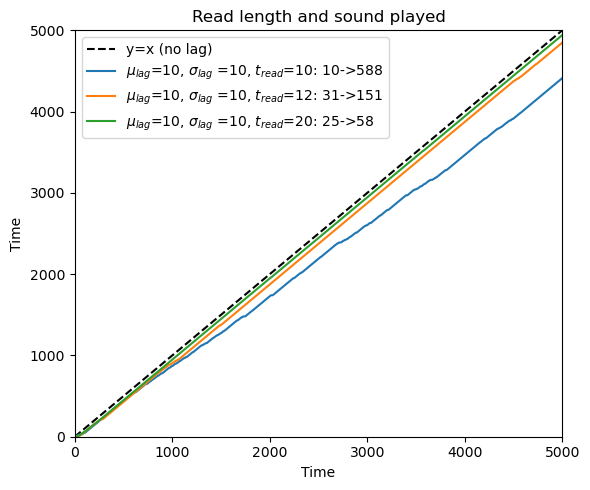

In [11]:
simconds = [
    [10, 10, 10],
    [10, 10, 12],
    [10, 10, 20]
]
fmtstring = "$\mu_{{lag}}$={}, $\sigma_{{lag}}$ ={}, $t_{{read}}$={}: {}->{}"
sim1 = simulate(*simconds[0])
sim2 = simulate(*simconds[1])
sim3 = simulate(*simconds[2])
lag1 = getlag(sim1)
lag2 = getlag(sim2)
lag3 = getlag(sim3)
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
axstg = AxesSetting("Read length and sound played", "Time", "Time", (0, 5000), (0, 5000))
axstg.plot_func(ax, lambda x: x, label="y=x (no lag)", c="black", ls="--", zorder=2)
ax.plot(sim1["t"], sim1["last"], label=fmtstring.format(*simconds[0], *lag1))
ax.plot(sim2["t"], sim2["last"], label=fmtstring.format(*simconds[1], *lag2))
ax.plot(sim3["t"], sim3["last"], label=fmtstring.format(*simconds[2], *lag3))
axstg.apply_axes(ax)
fig.tight_layout()

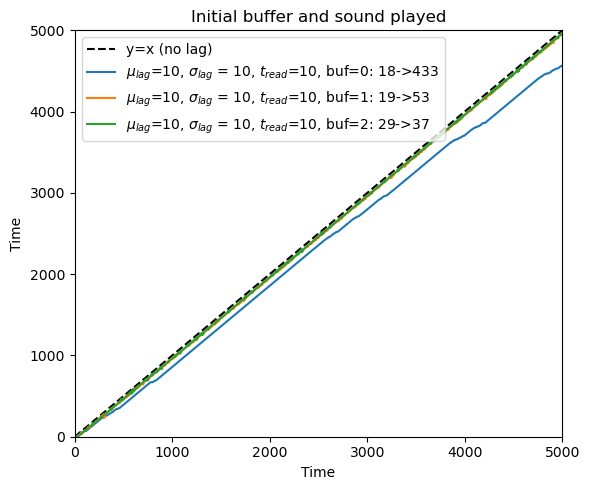

In [12]:
simconds = [
    [10, 10, 10, 0],
    [10, 10, 10, 1],
    [10, 10, 10, 2]
]
fmtstring = "$\mu_{{lag}}$={}, $\sigma_{{lag}}$={}, $t_{{read}}$={}, buf={}: {}->{}"
sim1 = simulate(*simconds[0])
sim2 = simulate(*simconds[1])
sim3 = simulate(*simconds[2])
lag1 = getlag(sim1)
lag2 = getlag(sim2)
lag3 = getlag(sim3)
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
axstg = AxesSetting("Initial buffer and sound played", "Time", "Time", (0, 5000), (0, 5000))
axstg.plot_func(ax, lambda x: x, label="y=x (no lag)", c="black", ls="--", zorder=2)
ax.plot(sim1["t"], sim1["last"], label="$\mu_{{lag}}$={0}, $\sigma_{{lag}}$ = {2}, $t_{{read}}$={1}, buf={3}: {4}->{5}".format(*simconds[0], *lag1))
ax.plot(sim2["t"], sim2["last"], label="$\mu_{{lag}}$={0}, $\sigma_{{lag}}$ = {2}, $t_{{read}}$={1}, buf={3}: {4}->{5}".format(*simconds[1], *lag2))
ax.plot(sim3["t"], sim3["last"], label="$\mu_{{lag}}$={0}, $\sigma_{{lag}}$ = {2}, $t_{{read}}$={1}, buf={3}: {4}->{5}".format(*simconds[2], *lag3))
axstg.apply_axes(ax)
fig.tight_layout()

In [3]:
simresult_readlength = []
for i in range(2000):
    lag = getlag(simulate(10, 10, 20, 0))
    simresult_readlength.append(lag)

In [4]:
simresult_buffer = []
for i in range(2000):
    lag = getlag(simulate(10, 10, 10, 1))
    simresult_buffer.append(lag)


In [5]:
sim_rl_avg = np.mean(simresult_readlength, axis=0)
sim_rl_stdev = np.std(simresult_readlength, axis = 0)
print("RL", sim_rl_avg, sim_rl_stdev)
sim_buf_avg = np.mean(simresult_buffer, axis=0)
sim_buf_stdev = np.std(simresult_buffer, axis=0)
print("BUF", sim_buf_avg, sim_buf_stdev)

RL [30.3725 62.7155] [8.48479486 6.49103688]
BUF [24.0115 43.698 ] [7.53965303 7.88084995]
